# A/B Test Result Analysis

## Case
A cooking website sells cooking equipment. They want to improve their product page. The product page has a rail with media (images or videos). Up until now, they have had a horizontal rail, a UX designer suggested having a vertical one. Upon suggestion an AB test was conducted. The results of the test are available for analysis to advise the company on whether they should ship the feature (vertical media rail) or not.

In [75]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
import seaborn as sns

## Importing and Exploring the Dataset

In [76]:
df = pd.read_csv('assessment_da25.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Variant                2000 non-null   object 
 1   Number of page views   2000 non-null   int64  
 2   GMV (in $)             2000 non-null   float64
 3   Number of add to cart  2000 non-null   int64  
 4   Clicks on media        2000 non-null   int64  
 5   Time on Page (sec)     2000 non-null   int64  
 6   user_id                2000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 109.5+ KB


In [5]:
# Separate data into variants A and B
variant_A = df[df['Variant'] == 'A']
variant_B = df[df['Variant'] == 'B']

In [7]:
#Checking if sample sizes are equal
#Counting the number of observations in each group
sample_size_A = len(variant_A)
sample_size_B = len(variant_B)

# Comparing sample sizes
if sample_size_A == sample_size_B:
    print("Sample sizes are equal between variants A and B.")
else:
    print("Sample sizes are not equal between variants A and B.")

Sample sizes are equal between variants A and B.


## Summary statistics for all numerical columns

In [131]:
summary_stats = df.describe()
summary_stats.round(2)

,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,5.15,8.49,2.18,1.41,20.30,999.50
std,2.33,27.86,1.52,1.21,19.96,577.49
min,0.00,0.00,0.00,0.00,1.00,0.00
25%,3.00,0.00,1.00,1.00,6.00,499.75
50%,5.00,0.00,2.00,1.00,14.00,999.50
75%,7.00,0.00,3.00,2.00,28.00,1499.25
max,15.00,152.61,10.00,7.00,143.00,1999.00


## Primary Metric
### Null Hypothesis: 
There is no significant difference in the average number of add to carts between the two versions
### Alternative Hypothesis: 
There is no significant difference in the average number of add to carts between the two versions

In [125]:
# Choose primary metric (Number of add to cart)
primary_metric = 'Number of add to cart'

# Perform two-sample t-test on the chosen metric
t_stat, p_value = stats.ttest_ind(variant_A[primary_metric], variant_B[primary_metric])

# Print results of t-test
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Compare p-value to significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the groups based on", primary_metric)
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups based on", primary_metric)# Visual Inspection for Normality

T-Statistic: -8.777389396187946
P-Value: 3.517078745065221e-18
Reject the null hypothesis. There is a significant difference between the groups based on Number of add to cart


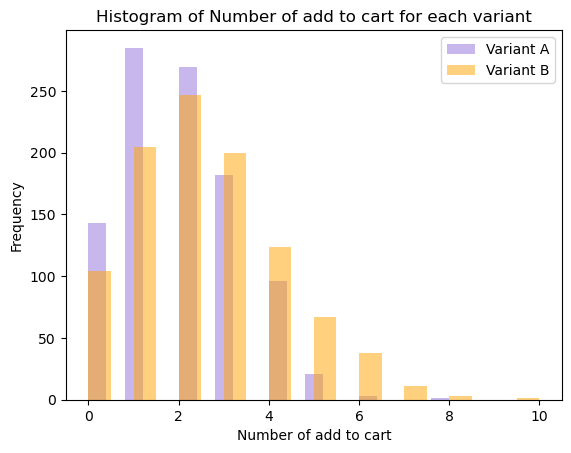

In [124]:
#Plotting a histogram
plt.hist(variant_A[primary_metric], bins=20, alpha=0.5, label='Variant A', color='mediumpurple')
plt.hist(variant_B[primary_metric], bins=20, alpha=0.5, label='Variant B', color='orange')
plt.xlabel(primary_metric)
plt.ylabel('Frequency')
plt.title('Histogram of ' + primary_metric + ' for each variant')
plt.legend()
plt.show()

In [123]:
# Calculate the mean of the secondary metric for each variant
mean_variant_A = variant_A[primary_metric].mean()
mean_variant_B = variant_B[primary_metric].mean()

# Print the means
print("Mean", primary_metric, "for Variant A:", mean_variant_A)
print("Mean", primary_metric, "for Variant B:", mean_variant_B)

# Determine which variant outperformed the other
if mean_variant_A > mean_variant_B:
    print("Variant A outperformed Variant B based on", primary_metric)
elif mean_variant_A < mean_variant_B:
    print("Variant B outperformed Variant A based on", primary_metric)
else:
    print("There is no difference in performance between Variant A and Variant B based on", primary_metric)

Mean Number of add to cart for Variant A: 1.884
Mean Number of add to cart for Variant B: 2.469
Variant B outperformed Variant A based on Number of add to cart


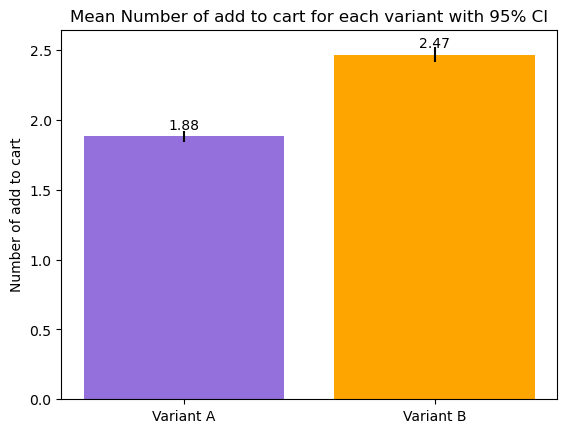

In [128]:
import numpy as np

# Calculate mean values
means = [variant_A[primary_metric].mean(), variant_B[primary_metric].mean()]

# Calculate the position for placing the text annotations
x_pos = np.arange(len(means))

# Plot the bar chart with error bars
plt.bar(['Variant A', 'Variant B'], 
        means, 
        yerr=[variant_A[primary_metric].sem(), variant_B[primary_metric].sem()], 
        color=['mediumpurple', 'orange'])

# Add the mean values as text annotations
for i, mean in enumerate(means):
    plt.text(x_pos[i], mean + 0.05, f'{mean:.2f}', ha='center')

plt.ylabel(primary_metric)
plt.title('Mean ' + primary_metric + ' for each variant with 95% CI')
plt.show()


## Secondary Metric 1
### Null Hypothesis:
There is no significant difference in the average clicks on media between the two versions
### Alternative Hypothesis:
There is no significant difference in the average clicks on media between the two versions

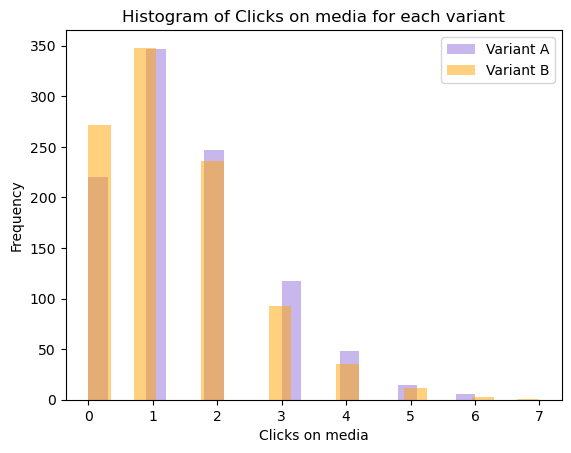

In [79]:
#Secondary metric 1(Clicks on media)
secondary_metric_1= 'Clicks on media'
# Plot histogram
plt.hist(variant_A[secondary_metric_1], bins=20, alpha=0.5, label='Variant A', color='mediumpurple')
plt.hist(variant_B[secondary_metric_1], bins=20, alpha=0.5, label='Variant B', color='orange')
plt.xlabel(secondary_metric_1)
plt.ylabel('Frequency')
plt.title('Histogram of ' + secondary_metric_1 + ' for each variant')
plt.legend()
plt.show()

In [102]:
# Perform two-sample t-test on secondary metric 1 (Clicks on media)
t_stat_sm1, p_value_sm1 = stats.ttest_ind(variant_A[secondary_metric_1], variant_B[secondary_metric_1])

# Print results of t-test
print("T-Statistic:", t_stat_sm1)
print("P-Value:", p_value_sm1)

# Compare p-value to significance level (e.g., 0.05)
alpha = 0.05
if p_value_sm1 < alpha:
    print("Reject the null hypothesis. There is a significant difference between the groups based on", secondary_metric_1)
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups based on", secondary_metric_1)

T-Statistic: 3.1710702328903153
P-Value: 0.0015418189281850277
Reject the null hypothesis. There is a significant difference between the groups based on Clicks on media


In [113]:
# Calculate the mean of the secondary metric for each variant
mean_variant_A_sm1 = variant_A[secondary_metric_1].mean()
mean_variant_B_sm1 = variant_B[secondary_metric_1].mean()

# Print the means
print("Mean", secondary_metric_1, "for Variant A:", mean_variant_A_sm1)
print("Mean", secondary_metric_1, "for Variant B:", mean_variant_B_sm1)

# Determine which variant outperformed the other
if mean_variant_A_sm1 > mean_variant_B_sm1:
    print("Variant A outperformed Variant B based on", secondary_metric_1)
elif mean_variant_A_sm1 < mean_variant_B_sm1:
    print("Variant B outperformed Variant A based on", secondary_metric_1)
else:
    print("There is no difference in performance between Variant A and Variant B based on", secondary_metric_1)

Mean Clicks on media for Variant A: 1.495
Mean Clicks on media for Variant B: 1.324
Variant A outperformed Variant B based on Clicks on media


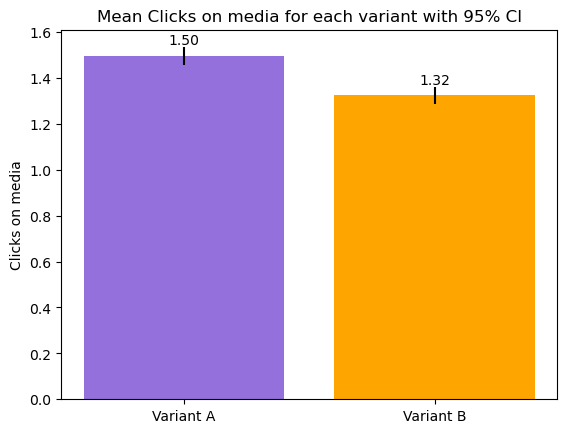

In [129]:
import numpy as np

# Calculate mean values
means_1 = [variant_A[secondary_metric_1].mean(), variant_B[secondary_metric_1].mean()]

# Calculate the position for placing the text annotations
x_pos_1 = np.arange(len(means_1))

# Plot the bar chart with error bars
plt.bar(['Variant A', 'Variant B'], 
        means_1, 
        yerr=[variant_A[secondary_metric_1].sem(), variant_B[secondary_metric_1].sem()], 
        color=['mediumpurple', 'orange'])

# Add the mean values as text annotations
for i, mean_1 in enumerate(means_1):
    plt.text(x_pos[i], mean_1 + 0.05, f'{mean_1:.2f}', ha='center')

plt.ylabel(secondary_metric_1)
plt.title('Mean ' + secondary_metric_1 + ' for each variant with 95% CI')
plt.show()

## Secondary Metric 2
### Null Hypothesis:
There is no significant difference in the average number of add to carts between the two versions
### Alternative Hypothesis:
There is no significant difference in the average number of add to carts between the two versions

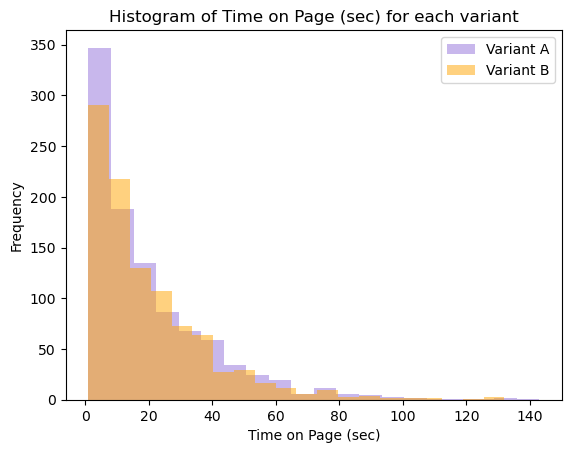

In [80]:
#Secondary metric 2 (Time on Page)
secondary_metric_2= 'Time on Page (sec)'
# Plot histogram
plt.hist(variant_A[secondary_metric_2], bins=20, alpha=0.5, label='Variant A', color='mediumpurple')
plt.hist(variant_B[secondary_metric_2], bins=20, alpha=0.5, label='Variant B', color='orange')
plt.xlabel(secondary_metric_2)
plt.ylabel('Frequency')
plt.title('Histogram of ' + secondary_metric_2 + ' for each variant')
plt.legend()
plt.show()

In [118]:
# Calculate the mean of the secondary metric for each variant
mean_variant_A_sm2 = variant_A[secondary_metric_2].mean()
mean_variant_B_sm2 = variant_B[secondary_metric_2].mean()

# Print the means
print("Mean", secondary_metric_2, "for Variant A:", mean_variant_A_sm2)
print("Mean", secondary_metric_2, "for Variant B:", mean_variant_B_sm2)

Mean Time on Page (sec) for Variant A: 20.543
Mean Time on Page (sec) for Variant B: 20.047


In [101]:
# Perform two-sample t-test on the secondary metric 2 (Time on page)
t_stat_sm2, p_value_sm2 = stats.ttest_ind(variant_A[secondary_metric_2], variant_B[secondary_metric_2])

# Print results of t-test
print("T-Statistic:", t_stat_sm2)
print("P-Value:", p_value_sm2)

# Compare p-value to significance level (e.g., 0.05)
alpha = 0.05
if p_value_sm2 < alpha:
    print("Reject the null hypothesis. There is a significant difference between the groups based on", secondary_metric_2)
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups based on", secondary_metric_2)

T-Statistic: 0.5554299489081426
P-Value: 0.5786627940817111
Fail to reject the null hypothesis. There is no significant difference between the groups based on Time on Page (sec)


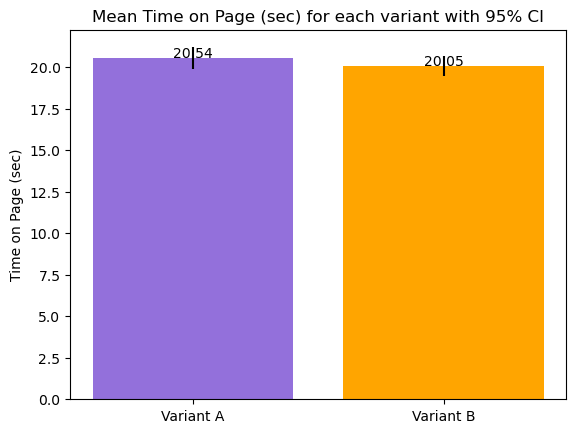

In [130]:
# Calculate mean values
means_2 = [variant_A[secondary_metric_2].mean(), variant_B[secondary_metric_2].mean()]

# Calculate the position for placing the text annotations
x_pos_2 = np.arange(len(means_2))

# Plot the bar chart with error bars
plt.bar(['Variant A', 'Variant B'], 
        means_2, 
        yerr=[variant_A[secondary_metric_2].sem(), variant_B[secondary_metric_2].sem()], 
        color=['mediumpurple', 'orange'])

# Add the mean values as text annotations
for i, mean_2 in enumerate(means_2):
    plt.text(x_pos[i], mean_2 + 0.05, f'{mean_2:.2f}', ha='center')

plt.ylabel(secondary_metric_2)
plt.title('Mean ' + secondary_metric_2 + ' for each variant with 95% CI')
plt.show()